## NCI Data Access: Python NetCDF with cdms2

##### The cdms2 module is part of the climate anaylsis tool UV-CDAT (Ultrascale Visualization Climate Data Analysis Tools): http://uvcdat.llnl.gov/index.html
##### It can also be downloaded as part of the smaller 'CDAT-lite' package: https://pypi.python.org/pypi/cdat-lite/5.2

### If working from Raijin or the VDI (Virtual Desktop Infrastructure), load the required modules

```
$ module load python/2.7.5 
$ module load uvcdat/2.0.0   (on VDI)
$ module load cdat/5.2       (on Raijin)

```

### Import modules

In [2]:
import cdms2
import matplotlib.pyplot as plt
%matplotlib inline

### Load local file or remote using OPeNDAP:

In [3]:
filename = '~/Downloads/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc' 
opendap_url = 'http://dapds00.nci.org.au/thredds/dodsC/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-28_2013.nc'

### Open file:

In [4]:
# Open using local file path
nc = cdms2.open(filename, 'r')

# Open using OPeNDAP url
nc_opendap = cdms2.open(opendap_url, 'r')

### Display file contents:

In [5]:
print "{:20} {:20} \n".format('Variable:', 'Shape:')
for var in nc.variables:
    print "{:20} {:20}".format(var, nc.variables[var].shape)

Variable:            Shape:               

crs                  ()                  
band_6               (61, 4000, 4000)    
band_7               (61, 4000, 4000)    
band_4               (61, 4000, 4000)    
band_5               (61, 4000, 4000)    
band_2               (61, 4000, 4000)    
band_3               (61, 4000, 4000)    
band_1               (61, 4000, 4000)    
extra_metadata       (61, 30000)         


### View variable information

In [6]:
band_1 = nc.variables['band_1']

In [7]:
print "{:20} {:20} \n".format('Attribute:', 'Value:')
for attr in band_1.attributes:
    print "{:20} {:20}".format(attr, band_1.attributes[attr])

Attribute:           Value:               

units                1                   
_FillValue           [-999]              
grid_mapping         crs                 
missing_value        None                
long_name            Nadir BRDF Adjusted Reflectance 0.43-0.45 microns (Coastal Aerosol)


### Extract and plot example

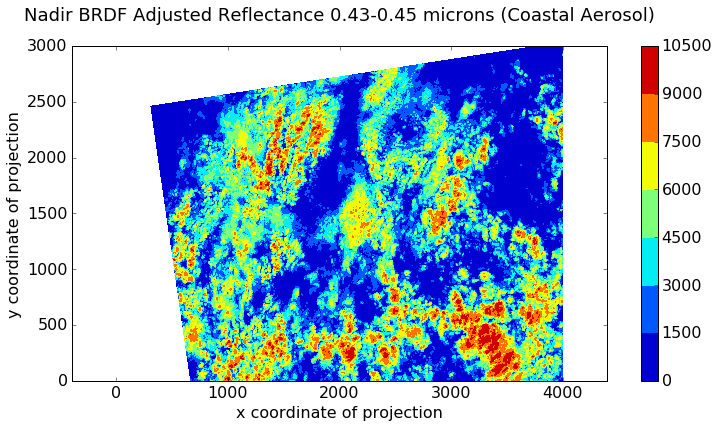

In [8]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(band_1[0,:3000,:4000])
plt.axis('equal')
cbar = plt.colorbar()

# Add figure title and labels
plt.title(band_1.long_name+'\n', fontsize=18)
plt.xlabel(nc['x'].long_name, fontsize=16)
plt.ylabel(nc['y'].long_name, fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)